**Загрузим необходимые библиотеки и данные**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



**satisfaction_level:** A numeric indicator filled out by the employee ranging from 0 to 1

**last_evaluation:** A numeric indicator filled in by the employee’s manager ranging from 0 to 1

**number_project:** An integer that indicates the number of projects the employee has worked on

**average_monthly_hours:** The number of hours employees work in the month

**time_spend_company:** An integer value indicated the years of service

**Work_accident:** A dummy variable assessing whether(1) or not (0) they had an accident

**left:** A dummy variable, leave (1), not leave(0)

**promoted_last_5years:** A dummy variable, promoted(1), not promoted(0)

**sales:** A categorical variable assessing the department in which employee is working (sales,technical,support,IT, product,marketing, other)

**salary:** A 3-level categorical variable (low, medium, high)

**Рассчитаем и визуализируем корреляционную матрицу для переменных.**

In [4]:
import statistics

for x in data.columns:
    print("median {}:".format(x), statistics.median(data[x]), 
          'mode {}:'.format(x), statistics.mode(data[x]))

median satisfaction_level: 0.64 mode satisfaction_level: 0.1
median last_evaluation: 0.72 mode last_evaluation: 0.55
median number_project: 4 mode number_project: 4
median average_montly_hours: 200 mode average_montly_hours: 135
median time_spend_company: 3 mode time_spend_company: 3
median Work_accident: 0 mode Work_accident: 0
median left: 0 mode left: 0
median promotion_last_5years: 0 mode promotion_last_5years: 0
median sales: sales mode sales: sales
median salary: low mode salary: low


**Визуализируем несколько взаимосвязей между переменными.**

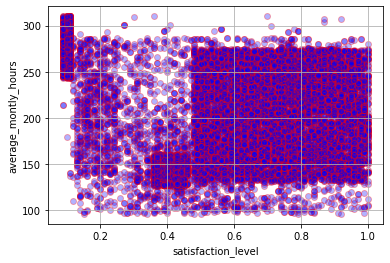

In [5]:
satisfaction_level = data['satisfaction_level']
number_project = data['average_montly_hours']
fig, ax = plt.subplots()
ax.scatter(satisfaction_level, number_project, c='blue', alpha=0.3, edgecolors='red')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()

Количество ежемесячных часов слабо связано с удовлетворенностью работой, в целом распределение стремится к равномерном, есть небольшой пробел в промежутке удовлетворенности от 0.25 до 0.45 и количества рабочих часов больше 160, в этой выборке наименьшая плотность 

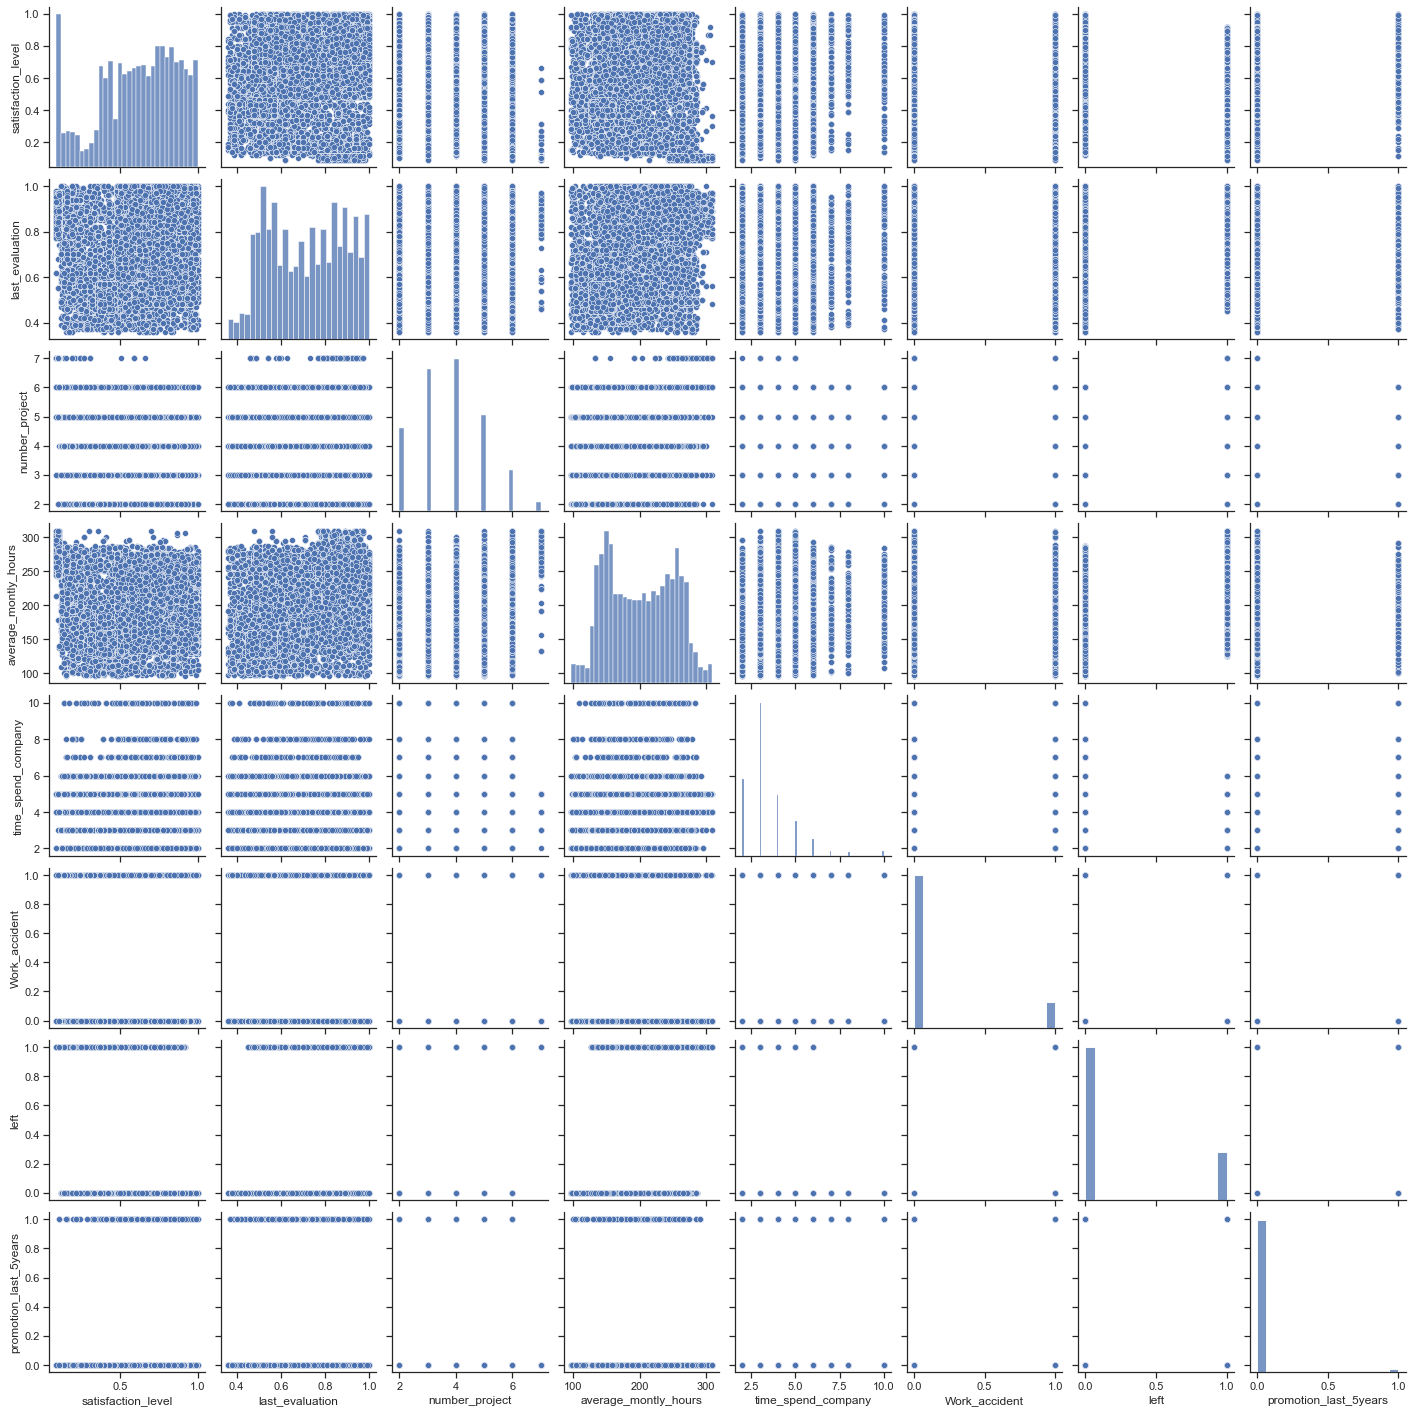

In [6]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data.filter(items = ['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']))


Данные по большей части коррелированы нелинейно. Сделаем One-hot encoding и построим матрицу корреляций. 

In [7]:
print(data.sales.unique())
print(data.salary.unique())


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
data['department'] = data['sales']
data.loc[data['sales'] == 'sales', 'department'] = 0
data.loc[data['sales'] == 'accounting', 'department'] = 1
data.loc[data['sales'] == 'hr', 'department'] = 2
data.loc[data['sales'] == 'technical', 'department'] = 3
data.loc[data['sales'] == 'support', 'department'] = 4
data.loc[data['sales'] == 'management', 'department'] = 5
data.loc[data['sales'] == 'IT', 'department'] = 6
data.loc[data['sales'] == 'product_mng', 'department'] = 7
data.loc[data['sales'] == 'marketing', 'department'] = 8
data.loc[data['sales'] == 'RandD', 'department'] = 9

In [9]:
data['salary_class'] = data['salary']
data.loc[data['salary'] == 'low', 'salary_class'] = 0
data.loc[data['salary'] == 'medium', 'salary_class'] = 1
data.loc[data['salary'] == 'high', 'salary_class'] = 2

In [10]:
data['department'] = pd.to_numeric(data['department'])
data['salary_class'] = pd.to_numeric(data['salary_class'])

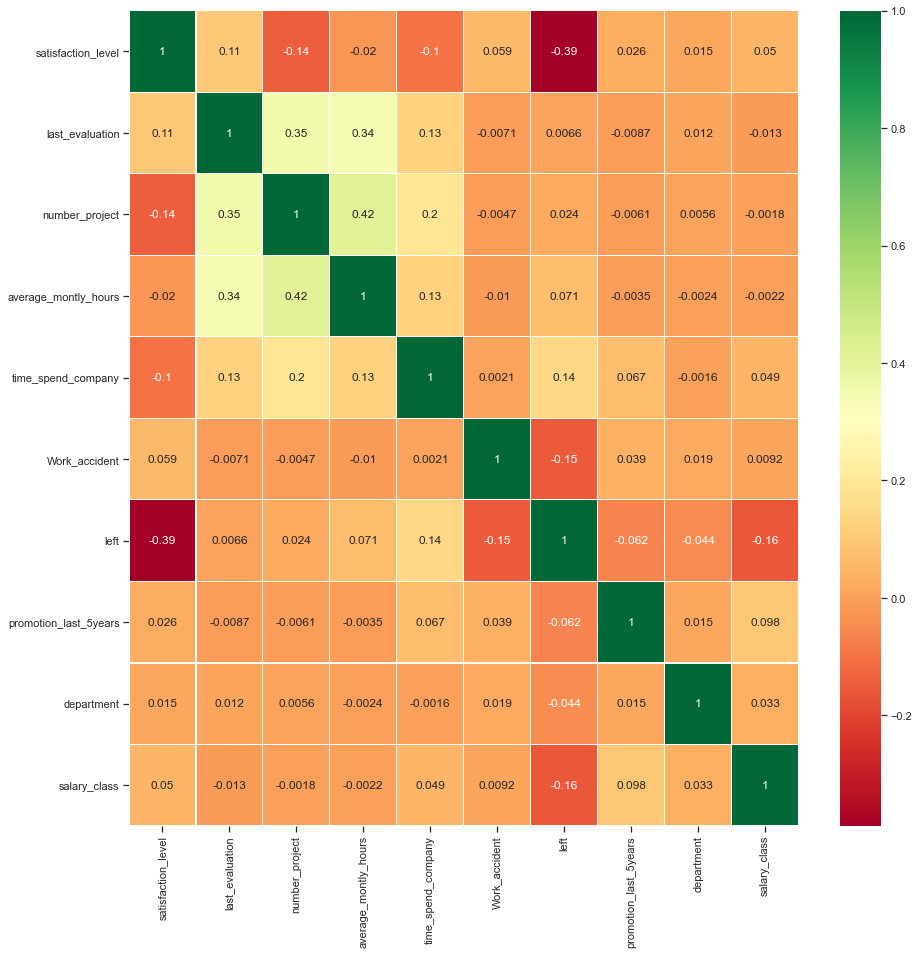

In [11]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Наблюдается средняя обратная корреляция между уровнем удовлетворенности и статусом покинул, средняя корреляция между показателями количество проектов и количество часов в месяц, количество проектов и последняя оценка, количество часов в месяц и последняя оценка. Также наблюдается слабая обратная корреляция между уровнем зарплаты и статусом покинул, несчастным случаем статусом покинул, количеством проектов и уровнем удовлетворенности 

**Проверим взаимосвязи между несколькими переменными**

In [12]:
# проверим насколько выборка соответствует нормальному распределению перед проверкой гипотез
from scipy.stats import shapiro, normaltest, anderson

print('Тест Шапиро-Вилка:',shapiro(data['satisfaction_level'])) # Тест Шапиро-Вилка
print('Тест Агостино на K ^ 2: ',normaltest(data['satisfaction_level'])) # Тест д'Агостино на K ^ 2


Тест Шапиро-Вилка: ShapiroResult(statistic=0.9518948793411255, pvalue=0.0)
Тест Агостино на K ^ 2:  NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261)


C:\Users\George\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Т.к оба теста вернули p-value < 0.05: мы отвергаем нулевую гипотезу о том, что данные соответствуют нормальному распределению

В данном случает результат t-теста говорит о том, что выборки имеют значительные отличия, т.к p-value<0.05 и t = 51 

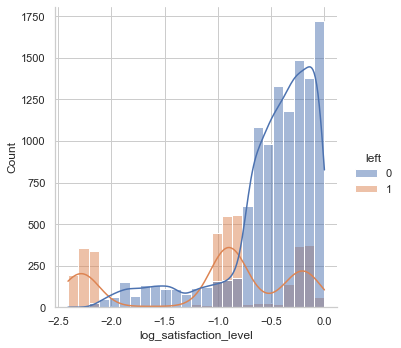

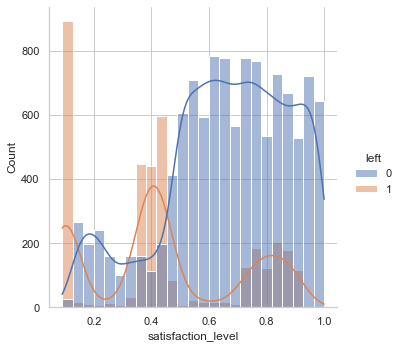

In [13]:
# приведем к логнормальному распределению и аналогично проверить выборки 
sns.set_style("whitegrid")
data["log_satisfaction_level"] = np.log(data["satisfaction_level"])
sns.displot(x = "log_satisfaction_level", bins = 25, kde = True, hue = 'left',   data=data)
sns.displot(x = "satisfaction_level", bins = 25, kde = True, hue = 'left',   data=data)

На графике можно видеть, что логарифмированные и исходные данные различаются по распределению в зависимости от значения класса left

In [68]:
# в качестве критерия для проверки гипотез возьмем критерий Манна-Уитни
# т.к Данные не сооответствуют нормальному распределению, проверяем 2 несвязанные выборки
from scipy import stats

print('mannwhitneyu: ',stats.mannwhitneyu(data.loc[data['left'] == 0, 'satisfaction_level'] ,
                data.loc[data['left'] == 1, 'satisfaction_level'])) # Критерий Манна-Уитник

print('ttest_ind: ',stats.ttest_ind(data.loc[data['left'] == 0, 'satisfaction_level'] ,
                data.loc[data['left'] == 1, 'satisfaction_level'])) # Двухвыборчный t критерий для независимых выборок


mannwhitneyu:  MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)
ttest_ind:  Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


В данном случае критерий Манна-Уитни подтверждает, что выборки satisfaction_level в зависимости от класса left имеют значительное отличие. 

In [15]:
# Проверим аналогичным образом выборки last_evaluation в зависимости от класса number_of_project

print('Тест Шапиро-Вилка:',shapiro(data['last_evaluation'])) # Тест Шапиро-Вилка
print('Тест Агостино на K ^ 2: ',normaltest(data['last_evaluation'])) # Тест д'Агостино на K ^ 2

Тест Шапиро-Вилка: ShapiroResult(statistic=0.9522111415863037, pvalue=0.0)
Тест Агостино на K ^ 2:  NormaltestResult(statistic=19704.806926419373, pvalue=0.0)


C:\Users\George\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Отвергаем нулевую гипотезу о соответствии данных нормальному распределению 

In [16]:
list(data['number_project'].unique())

[2, 5, 7, 6, 4, 3]

In [17]:
# Т.к данные не соответствуют нормальному распределению, несвязаны и имеется более 3 классов по number_of_project 
# Применим критерий Краскела-Уоллиса 
from scipy.stats import mstats

mstats.kruskalwallis(list(data.loc[data['number_project'] == 2, 'last_evaluation']),
                     list(data.loc[data['number_project'] == 3, 'last_evaluation']), 
                     list(data.loc[data['number_project'] == 4, 'last_evaluation']), 
                     list(data.loc[data['number_project'] == 5, 'last_evaluation']),
                    list(data.loc[data['number_project'] == 6, 'last_evaluation']),
                    list(data.loc[data['number_project'] == 7, 'last_evaluation']))

KruskalResult(statistic=2509.1788890321395, pvalue=0.0)

Критерий Краскела-Уоллиса показал, что выборки имеют статистически значимые различия 

In [18]:
# Проверим аналогичным образом выборки average_montly_hours в зависимости от класса number_of_project

print('Тест Шапиро-Вилка:',shapiro(data['average_montly_hours'])) # Тест Шапиро-Вилка
print('Тест Агостино на K ^ 2: ',normaltest(data['average_montly_hours'])) # Тест д'Агостино на K ^ 2

print('Тест Шапиро-Вилка log:', shapiro(np.log(data['average_montly_hours']))) # Тест Шапиро-Вилка
print('Тест Агостино на K ^ 2 log: ',normaltest(np.log(data['average_montly_hours']))) # Тест д'Агостино на K ^ 2


Тест Шапиро-Вилка: ShapiroResult(statistic=0.963361382484436, pvalue=0.0)
Тест Агостино на K ^ 2:  NormaltestResult(statistic=7806.49501776468, pvalue=0.0)
Тест Шапиро-Вилка log: ShapiroResult(statistic=0.959850549697876, pvalue=0.0)
Тест Агостино на K ^ 2 log:  NormaltestResult(statistic=2340.526001609317, pvalue=0.0)


C:\Users\George\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределение в выборке даже после после логарифмирования не соответствует нормальному, хотя и наблюдается снижение statistic 

In [19]:
mstats.kruskalwallis(list(data.loc[data['number_project'] == 2, 'average_montly_hours']),
                     list(data.loc[data['number_project'] == 3, 'average_montly_hours']), 
                     list(data.loc[data['number_project'] == 4, 'average_montly_hours']), 
                     list(data.loc[data['number_project'] == 5, 'average_montly_hours']),
                    list(data.loc[data['number_project'] == 6, 'average_montly_hours']),
                    list(data.loc[data['number_project'] == 7, 'average_montly_hours']))

KruskalResult(statistic=3004.077517668343, pvalue=0.0)

Критерий Краскела-Уоллиса показал, что выборки имеют еще большие статистически значимые различия чем по показателю last_evaluation

**Рассчитаем сколько работников работает в каждом департаменте.**

sales department employes count: 4140
accounting department employes count: 767
hr department employes count: 739
technical department employes count: 2720
support department employes count: 2229
management department employes count: 630
IT department employes count: 1227
product_mng department employes count: 902
marketing department employes count: 858
RandD department employes count: 787


<BarContainer object of 10 artists>

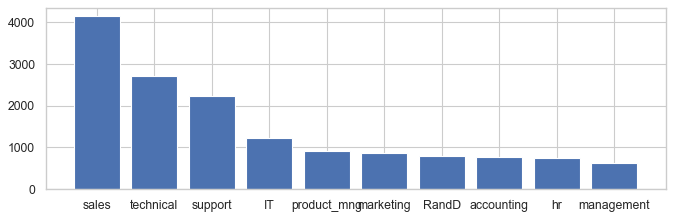

In [20]:
from matplotlib.pyplot import figure

departments = []
count_employes = []

for x in list(data['sales'].unique()):
    departments.append(x)
    count_employes.append(len(data[data['sales'] == x]))
    print(f'{x} department employes count:', len(data[data['sales'] == x]) )

d = {'departments': departments, 'count_employes': count_employes}
df = pd.DataFrame(data=d)
df = df.sort_values(by='count_employes', ascending=False)

figure(figsize=(10, 3), dpi=80)
plt.bar(df.departments, df.count_employes) 

**Посмотрим распределение сотрудников по зарплатам.**

([<matplotlib.patches.Wedge at 0x249db80eca0>,
 [Text(0.04226778373338524, 1.0991876247748915, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')])

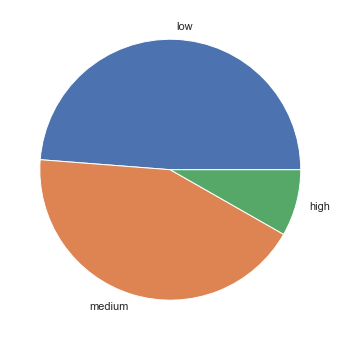

In [21]:
d_salary = []
labels = []

for i in data['salary'].unique():
    d_salary.append(len(data[data['salary'] == i]))
    labels.append(i)
    
figure(figsize=(6, 6))
plt.pie(d_salary, labels=labels)  

**Посмотрим распределение сотрудников по зарплатам совместно с департаментами.**

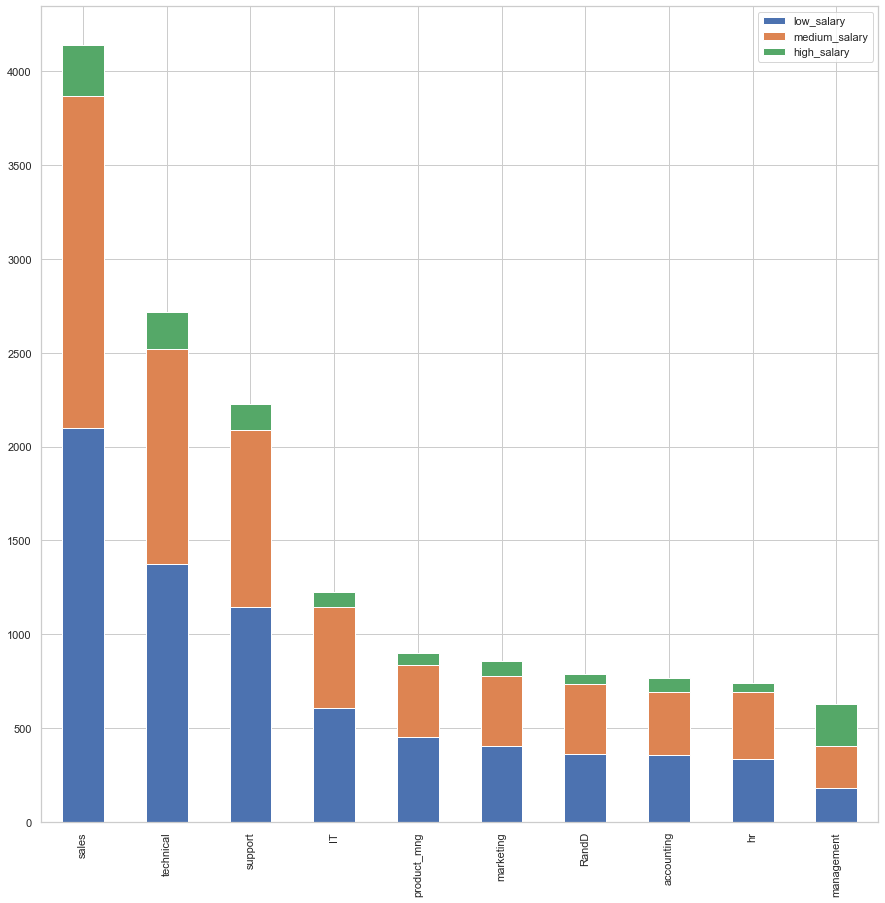

In [37]:
# Создадим словарь словарей departments который будет содержать 
# количество работников по классу зарплаты в каждом отделе

departments = {}

for i in data['sales'].unique():
    z = {}
    for x in data.loc[data['sales'] == i, 'salary'].unique():
        z[x] = len(data[(data['sales'] == i) & (data['salary'] == x)])
    departments[i] = z 
    
labels = [i for i in departments.keys()]
low_salary = [departments[i]['low'] for i in departments.keys()]
medium_salary = [departments[i]['medium'] for i in departments.keys()]
high_salary = [departments[i]['high'] for i in departments.keys()]


df = pd.DataFrame({'low_salary': low_salary,
                   'medium_salary': medium_salary, 
                  'high_salary': high_salary}, index=labels)

df['sum_employes'] = df['low_salary'] + df['medium_salary'] + df['high_salary']

df = df.sort_values(by='sum_employes', ascending=False)

ax = df.filter(items = ['low_salary', 'medium_salary', 'high_salary']).plot.bar(stacked=True)

Из данного графика можно сделать вывод, что отдел менеджмента является не только самым маленьким, но и самым высокооплачиваемым относительно количества работников в отделе. Самые крупные отделы: sales, technical, support. В отделах hr, accounting, RandD, marketing число работников с низкой зарплатой примерно равно число работников со средней зарплатой. 

**Узнаем сколько сотрудников покинули компанию.**

([<matplotlib.patches.Wedge at 0x249dfe58790>,
 [Text(0.8063868982611178, 0.7481578512004095, 'left'),
  Text(-0.8063868632373202, -0.7481578889501036, 'remained')])

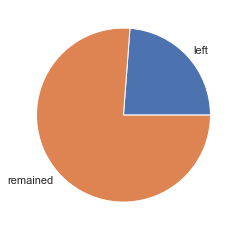

In [30]:
list_left = [len(data[data['left'] == 1]), len(data[data['left'] == 0])]
labels = ['left', 'remained']

figure(figsize=(4, 4))
plt.pie(list_left, labels=labels)  

Почти четверть сотрудников покинули компанию 

**Проверим несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

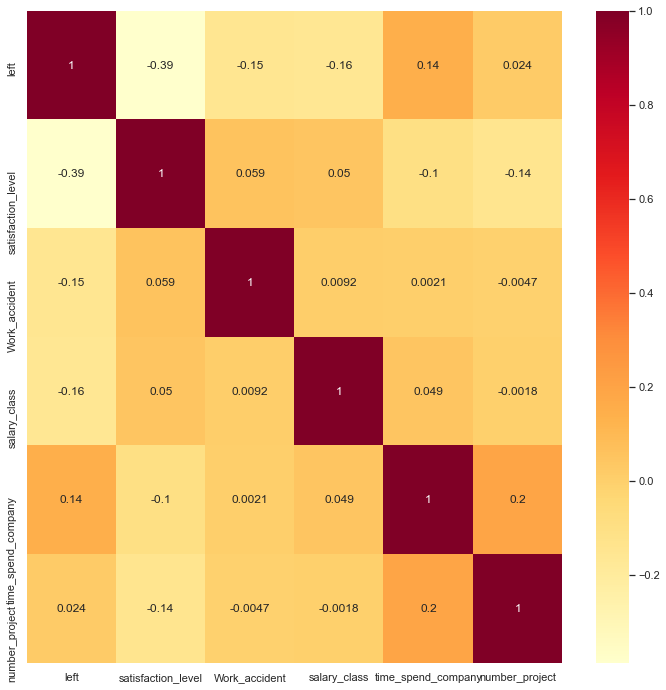

In [44]:
# Основные показатели коррелирующие со статусом покинул/ не покинул - это:
# satisfaction_level, Work_accident, salary_class, time_spend_company
# satisfaction_level связан также с number_project
# Посмотрим корреляцию этих параметров 

Correlation=data[['left','satisfaction_level','Work_accident', 'salary_class', 'time_spend_company', 'number_project']]
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

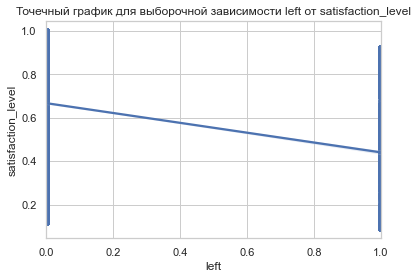

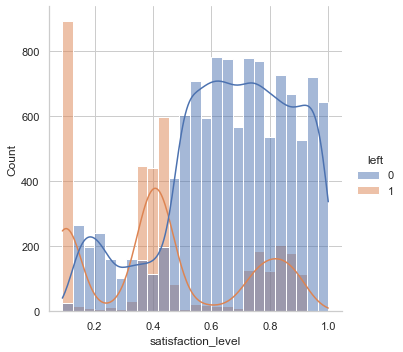

In [73]:
sns.regplot(x= data['left'], y= data['satisfaction_level'], fit_reg=True)
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.title('Точечный график для выборочной зависимости left от satisfaction_level')

sns.set_style("whitegrid")
sns.displot(x = "satisfaction_level", bins = 25, kde = True, hue = 'left',   data=data)


В данном случае, можно сделать вывод, что достижение метрики satisfaction_level примерно 0.65 и её последующее снижение до 0.45 часто приводит к увольнению сотрудника. Есть определенная частота увольнений и с высоким уровнем удовлетворенности, поэтому зависимость нелинейна, но можно сделать вывод, что чаще всего увольняются сотрудники с показателями удовлетворенности в в районе 0.35-0.45, а также 0. 

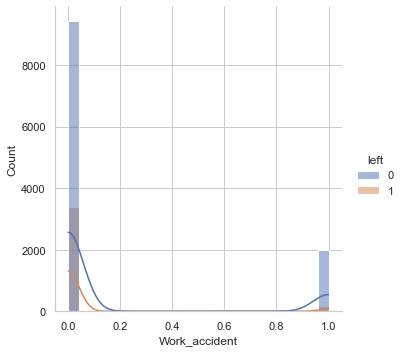

In [78]:
sns.set_style("whitegrid")
sns.displot(x = "Work_accident", bins = 25, kde = True, hue = 'left',  data=data)

Среди работников, с которыми произошёл несчастный случай, относительно, значительно меньше работников, которые уволились, чем среди тех, с которыми не было несчастного случая, следовательно несчастный случай не является одним из поводов для увольнения. Возможно не стоит уделять этой группе слишком много ресурсов, при проведении мероприятий по удержанию сотрудников. 

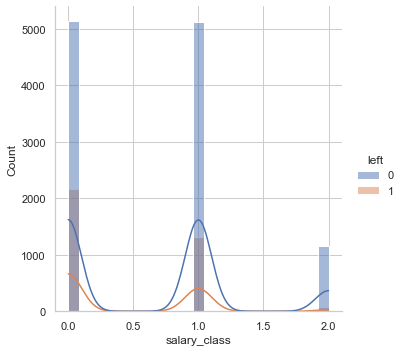

In [79]:
sns.set_style("whitegrid")
sns.displot(x = "salary_class", bins = 25, kde = True, hue = 'left',  data=data)

При повышении заработной платы снижается доля увольняющихся сотрудников относительно общего числа сотрудников с соответствующим классом заработной платы.

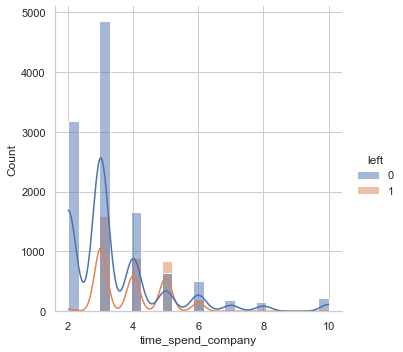

In [80]:
sns.set_style("whitegrid")
sns.displot(x = "time_spend_company", bins = 25, kde = True, hue = 'left',  data=data)

Наибольшее число работников в компании меньше 4 лет. До 3 лет практически нет увольнений, наибольшая доля увольнений к общему числу работников на 4 и 5 годах. За рассматриваемый период на 5 году работы уволилось больше работников чем осталось. Если работник отработал 7 лет, чаще всего он не увольняется вплоть до 10 лет

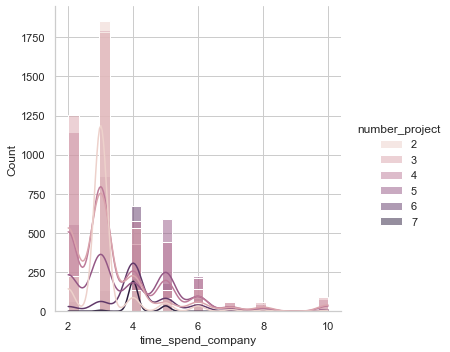

In [83]:
sns.set_style("whitegrid")
sns.displot(x = "time_spend_company", bins = 25, kde = True, hue = 'number_project',  data=data)

Чаще всего работающих от 4 до 6 лет нагружают наибольшим числом проектов, это оказывает влияние на решение уволиться именно в этот период работы. Возможно стоит снизить нагрузку на эту группу работников, тогда большая часть будет дорабатывать до 7 лет, тогда, возможно будет распределять проекты более равномерно, без риска потери сотрудника.  

**Подберём модель классификации для класса left** 

In [84]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,department,salary_class,log_satisfaction_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,-0.967584
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1,-0.223144
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1,-2.207275
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,-0.328504
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,-0.994252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,4,0,-0.916291
14995,0.37,0.48,2,160,3,0,1,0,support,low,4,0,-0.994252
14996,0.37,0.53,2,143,3,0,1,0,support,low,4,0,-0.994252
14997,0.11,0.96,6,280,4,0,1,0,support,low,4,0,-2.207275


In [87]:
# Разбиваем на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split
    
X = data.drop(["left",'sales', 'salary', 'log_satisfaction_level'], axis = 1) # исключим текстовые классы и класс, который прогнозируем
y = data["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
#Данные не сбалансированы, уравновесим представление 2-х классов в обучающей выборке методом up-sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train,y_train)

In [91]:
#Стандартизируем обучающую и тестовую выборку для корректного обучения 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

X_st_sm_train = min_max_scaler.fit_transform(X_sm)
X_st_sm_test = min_max_scaler.fit_transform(X_test)

X_st_sm_train = pd.DataFrame(X_st_sm_train)
X_st_sm_test = pd.DataFrame(X_st_sm_test)

headers = list(data.drop(["left",'sales', 'salary', 'log_satisfaction_level'], axis = 1).columns.values)

X_st_sm_train.columns = headers
X_st_sm_test.columns = headers

In [94]:
# Создадим функцию, которая будет подавать обучающую выборку и записывать качество полученной модели в список
# По параметрам точности и кросс-валидации 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

acc = []
cv_scores = []
def model(model):
    model.fit(X_st_sm_train, y_sm)
    score = model.score(X_st_sm_train, y_sm)
    print("Accuracy: {}".format(score))
    cv_score = cross_val_score(model,X_st_sm_train, y_sm,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    acc.append(score)
    cv_scores.append(np.mean(cv_score))

In [96]:
#Логистическая регрессия 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000, random_state = 4)
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.7930807970221152
Cross Val Score: 0.7913302620260529
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2294
           1       0.50      0.79      0.61       706

    accuracy                           0.77      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.82      0.77      0.78      3000



In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 1.0
Cross Val Score: 0.9828113923953905
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [98]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 1.0
Cross Val Score: 0.9675933480081229
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2294
           1       0.90      0.97      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [99]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.9687978979636523
Cross Val Score: 0.9530327773425086
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2294
           1       0.82      0.94      0.88       706

    accuracy                           0.94      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [100]:
from sklearn.svm import SVC
clf = SVC()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.9464637617692139
Cross Val Score: 0.9430155179081428
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2294
           1       0.85      0.90      0.87       706

    accuracy                           0.94      3000
   macro avg       0.91      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [102]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.6894022334136194
Cross Val Score: 0.689952069446486
              precision    recall  f1-score   support

           0       0.94      0.41      0.57      2294
           1       0.32      0.92      0.48       706

    accuracy                           0.53      3000
   macro avg       0.63      0.66      0.53      3000
weighted avg       0.80      0.53      0.55      3000



In [103]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.9417560761988176
Cross Val Score: 0.9398406600149144
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2294
           1       0.83      0.94      0.88       706

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



In [104]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
model(clf)

y_log_predict = clf.predict(X_st_sm_test)

tn = ['0','1']
print(classification_report(list(y_test), list(y_log_predict) , target_names=tn))

Accuracy: 0.9590540836435296
Cross Val Score: 0.9567549506437715
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2294
           1       0.91      0.94      0.93       706

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



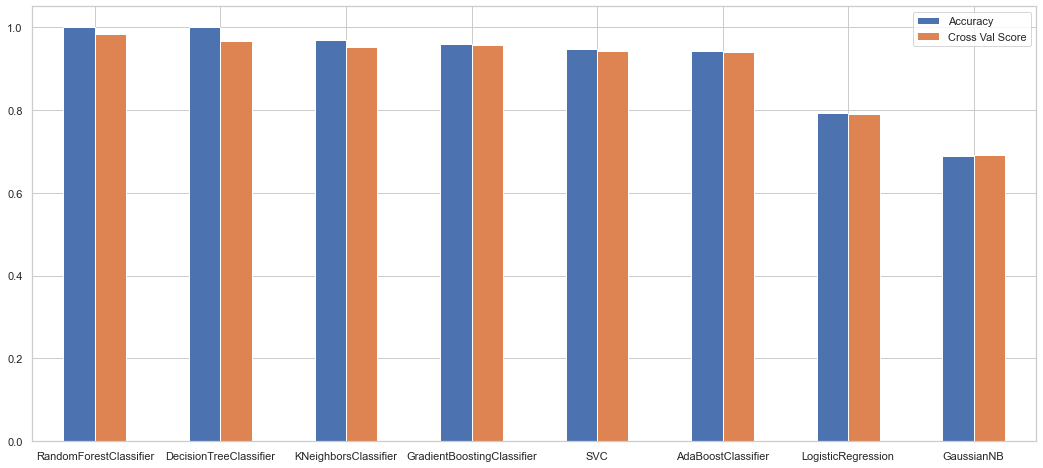

In [128]:
# Добавим результаты моделей в датафрейм и визуализируем
ind_list = ['LogisticRegression', 'LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 
            'KNeighborsClassifier', 'SVC', 'SVC', 'GaussianNB', 
            'AdaBoostClassifier', 'GradientBoostingClassifier'] 

dff = pd.DataFrame({'Accuracy': acc,
                   'Cross Val Score': cv_scores}, index=ind_list)

dff = dff.drop_duplicates().sort_values(by=['Accuracy','Cross Val Score'], ascending=False)

ax = dff.plot.bar(rot=0, figsize = (18,8))

Для нашей задачи лучше всего показала себя модель случайный лес (RandomForestClassifier). По оценке cross_val_score точность составляет 100%, результат теста кросс-валидации 98.28%; по оценке classification_report 
точность (precision) = (0.99, 0.98), полнота (recall) = (0.99, 0.96), F-мера (f1-score) = (0.99, 0.97) для классов left (0,1) соответственно. Это говорит о том, что 99-98% элементов, которые модель отнесла к одному из классов действительно относятся к таковому, а также модель находит 99-96% элементов класса среди всех, которые были представлены в выборке.       